In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('Tayko.csv')

# 1. 학습 데이터와 검증 데이터로 분할
train, test = train_test_split(df, test_size=0.3, random_state=42)



In [2]:
# 2. 다중 선형 회귀 모델 적합
X_train = train.drop(['Spending'], axis=1)
y_train = train['Spending']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())



C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     83.83
Date:                Mon, 17 Apr 2023   Prob (F-statistic):          1.03e-248
Time:                        16:53:15   Log-Likelihood:                -8694.7
No. Observations:                1400   AIC:                         1.744e+04
Df Residuals:                    1375   BIC:                         1.757e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2029 

In [3]:
# 3. 예측값이 가장 높을 것으로 예상되는 고객 유형 확인
mean_values = df.drop(['Spending'], axis=1).mean()
mean_values['const'] = 1
print(mean_values)
print(model.predict(mean_values))



sequence_number         1000.5000
US                         0.8245
source_a                   0.1265
source_c                   0.0560
source_b                   0.0600
source_d                   0.0415
source_e                   0.1510
source_m                   0.0165
source_o                   0.0335
source_h                   0.0525
source_r                   0.0685
source_s                   0.0470
source_t                   0.0215
source_u                   0.1190
source_p                   0.0060
source_x                   0.0180
source_w                   0.1375
Freq                       1.4170
last_update_days_ago    2155.1010
1st_update_days_ago     2435.6015
Web order                  0.4260
Gender=male                0.5245
Address_is_res             0.2210
Purchase                   0.5000
const                      1.0000
dtype: float64


ValueError: Length of values (1) does not match length of index (25)

In [4]:
# 4. 후진 제거법으로 변수 선택
X_train = train.drop(['Spending'], axis=1)
y_train = train['Spending']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
pvalues = model.pvalues
while pvalues.max() > 0.05:
    X_train = X_train.drop(pvalues.idxmax(), axis=1)
    model = sm.OLS(y_train, X_train).fit()
    pvalues = model.pvalues
print(model.summary())



C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                                 OLS Regression Results                                
Dep. Variable:               Spending   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                              371.7
Date:                Mon, 17 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:53:29   Log-Likelihood:                         -8703.8
No. Observations:                1400   AIC:                                  1.742e+04
Df Residuals:                    1392   BIC:                                  1.747e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [5]:
# 5. 검증 데이터 첫 번째 구매 데이터를 이용하여 예측값과 예측 오차 계산
X_test = test.drop(['Spending'], axis=1)
X_test = sm.add_constant(X_test)
y_test_pred = model.predict(X_test)
y_test_true = test['Spending']
test_error = y_test_true.iloc[0] - y_test_pred.iloc[0]
print('Test error:', test_error)



C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: shapes (600,25) and (8,) not aligned: 25 (dim 1) != 8 (dim 0)

In [6]:
# 6. 검증 데이터에 대한 모델 성능 평가
X_test = test.drop(['Spending'], axis=1)
X_test = sm.add_constant(X_test)
y_test_pred = model.predict(X_test)
y_test_true = test['Spending']
r2 = 1 - sum((y_test_true - y_test_pred)**2) / sum((y_test_true - y_test_true.mean())**2)
print('R^2:', r2)



ValueError: shapes (600,25) and (8,) not aligned: 25 (dim 1) != 8 (dim 0)

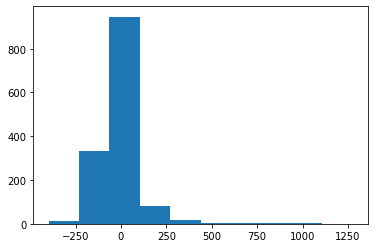

In [7]:
# 7. 잔차 히스토그램 작성 및 정규분포 여부 확인
residuals = model.resid
plt.hist(residuals)
plt.show()